# Perceptron

- It is an algorithm / Mathamatical model used for supervised ML, just because of it has an unique design now it becomes a fundamental building block for **Deep Learning**

### Logical view:

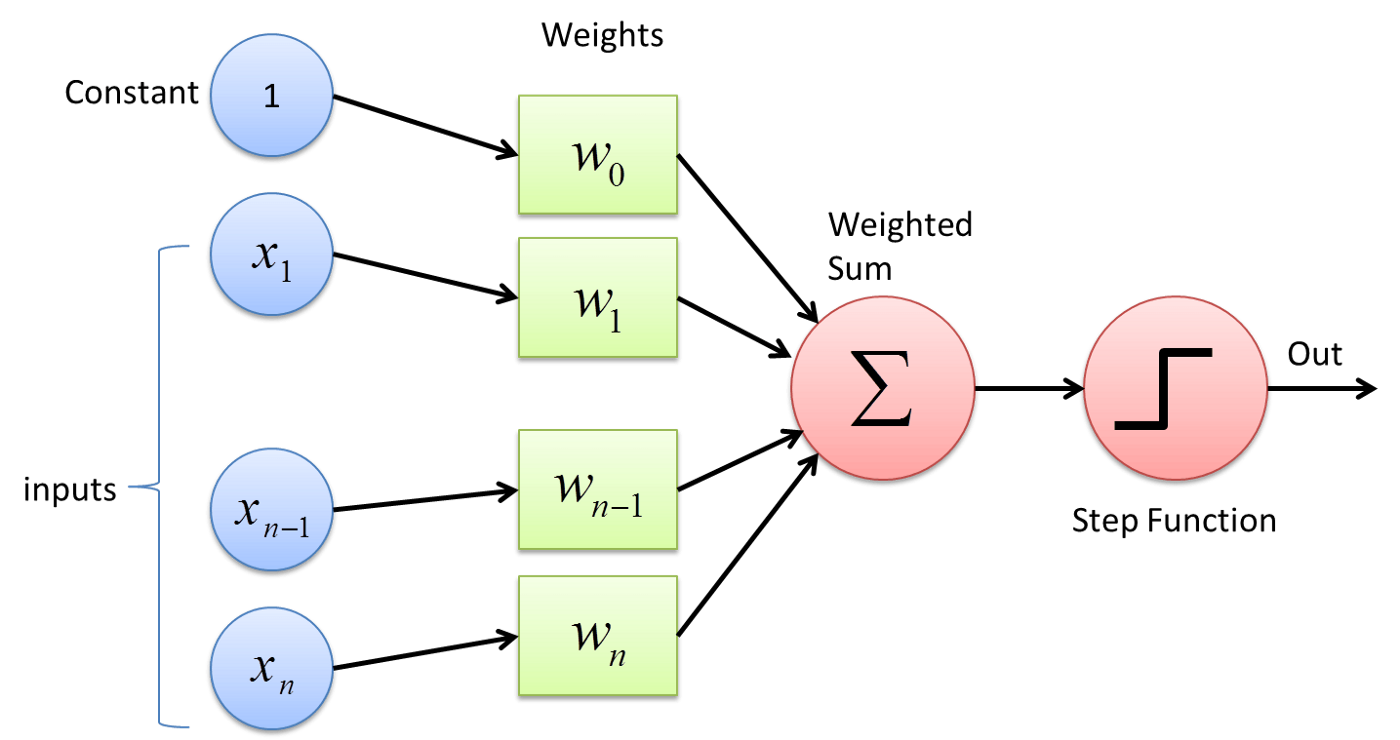

-	All the X [`x1` to `xn`] are the input values to be given
-	All the W except `w0` are called weights
-	W0 is the weighted bias which is constant
-	The first input line which is in this case 1 also constant
-	The weighted sum is where all the values get dot produced / summed
Eqn : ` z = w1x1 + w2x2 + w3x3+……..+wnxn + w0x0 `
-	Activation function are used to adjust the summed value into a particular range

Preffered video link:

[Video 1](https://youtu.be/X7iIKPoZ0Sw?si=_LRLQDiwBfnHKB_D)

[Video 2](https://youtu.be/Lu2bruOHN6g?si=d-sNh8AsGBEfKMTu)

- For moving the line towards +ve reigion and bringing the pt. at it's -ve reigion we will do `Line.eqn - Transfrommed coordinates`
- For moving the towards -ve reigion and bringing the pt. at it's +ve reigion we will do `Line.eqn + Transfrommed coordinates`

### Code Implementation

- Importing Library and making dataset

In [9]:
# from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
# X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [10]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([0,0,0,1])

In [11]:
# Accual Code
# X

In [12]:
X.shape

(4, 2)

In [13]:
y

array([0, 0, 0, 1])

In [14]:
y.shape

(4,)

<Axes: >

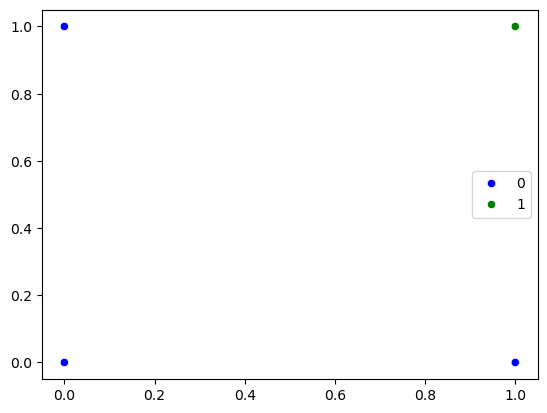

In [15]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,palette = ["blue","green"])

- Step Function

In [17]:
# This is a step function to regulate the value in range [0 - 1] and return 0 or 1 according to the answere
def step(value):
  if value > 0:
    return 1
  else:
    return 0

- Acccual code

In [19]:
def Perceptron(X,y):
  # Adding Bias 1 for all the rows in X
  X = np.insert(X,0,1,axis=1)
  # Initiating weights with default value 1 same as the size of the column of X
  weights =  np.ones(X[1].shape)
  # Initiating learning rate
  lr = 0.01
  # Initiating how many times the loop will run
  epoch = 5000
  for i in range(epoch):
    """
    Now I am selecting an random value from 0 to 100.

    Accully what I am trying to do is to genarate a radom Interger and then use it as a index to select a random row from X each time the loop
    runs, and I an selecting it from 0 to 100 because the X has also 100 row thats why to cover up all the rows in X it is necceary to pic value also in the range as X has
    """
    # randomInt = np.random.randint(0,100)
    # Comment the line bellow as this is modified for AND operation Perceptron
    randomInt = np.random.randint(0,4)
    """
    Now we do
    -> Dot product of the weight matrix and input nmatrix
    -> And send the value to the activation function to predic if the placement value is 1 or 0
    """
    dotProduct = np.dot(X[randomInt],weights)
    """
    This step function return whether the value of dot product will be opposite or negative number
    If it is a positive number then that function will return one and for negative number
    It will return zero.
    """
    y_predic = step(dotProduct)

    """
    Now I shall use the formulla for updating the weights according to the formulla given in the video.

    If -ve for
      case 1: weights = weights - * X[randomInt] * lr
      case 2: weights = weights + * X[randomInt] * lr
    """
    weights = weights + (y[randomInt] - y_predic) * X[randomInt] * lr

  """
  Here I am returning weights[0] as Intercept and weights[1:] as coefficient
  """
  return weights[0],weights[1:]

In [20]:
intercept_,coef_ = Perceptron(X,y)

print(coef_)
print(intercept_)

[0.4  0.46]
-0.47000000000000103


In [21]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [22]:
m

-0.8695652173913041

In [23]:
b

1.0217391304347858

In [24]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

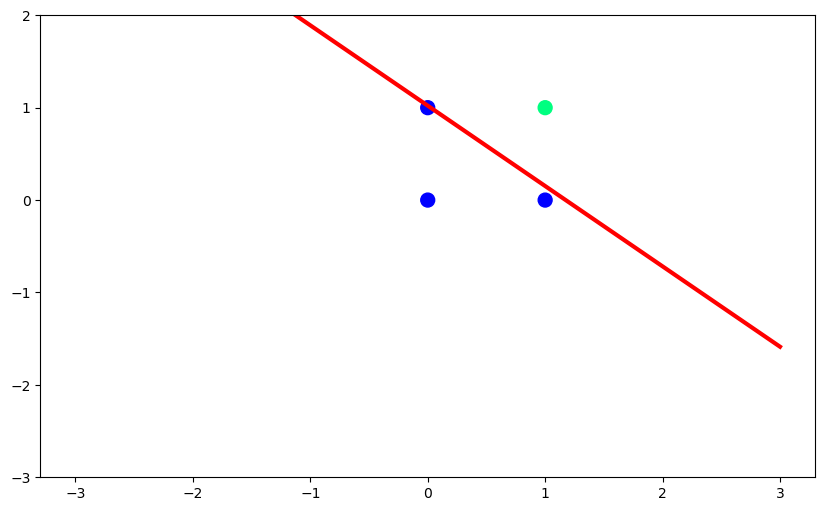

In [25]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### Prediction

In [27]:
"""
predict(New_Data_Row, Caculed_intercept_array, coefficeent)
"""
def predict(x_new, intercept, coef):
    x_new_with_bias = np.insert(x_new, 0, 1)  # Add bias term at beginning in that new data Row
    """
    Basically it Says insert the intercept part at the beggining of the coef array and  make it a new array
    """
    weights = np.insert(coef, 0, intercept)   # Combine intercept and coefficients
    result = np.dot(x_new_with_bias, weights)
    return step(result)  # 0 or 1


In [28]:
# Test Set
teast_set = np.array([[0,0],
                      [0,1],
                      [1,0],
                      [1,1]])
Y = np.array([0,0,0,1])

In [29]:
for i in teast_set:
  print(f"Predction for: {i} is",end=" ")
  print(predict(i, intercept_,coef_))

Predction for: [0 0] is 0
Predction for: [0 1] is 0
Predction for: [1 0] is 0
Predction for: [1 1] is 1


### Accuracy

In [31]:
score = list()
for i in teast_set:

  score.append(predict(i, intercept_,coef_))

ans = list(Y)
print(f"Accuracy is {accuracy_score(ans, score)*100}%")

Accuracy is 100.0%
